Data Set Description 🧾
👉 This dataset comprises 13 variables:

* 8 categorical variables,
* 4 continuous variables,
* 1 variable for the loan ID.
<br>
👉 Below is the structure of the dataset.
<br>

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>









 Importing Libraries 📚

👉 Importing libraries  in notebook.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")


Load the Dataset:

The dataset is loaded using pandas.

Ma'lumotlar to'plami pandas yordamida yuklanadi.

Набор данных загружается с помощью pandas

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/Alazizxan/Credit_ml-model-DaTa-Science/main/loan_data_set.csv")
print(df.shape)
df.head()


(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


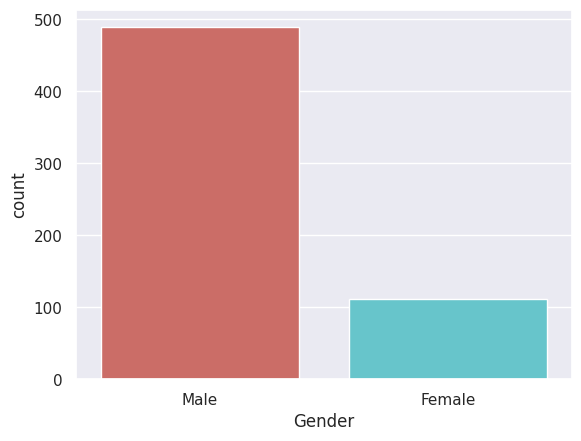

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [36]:
# Gender bo'yicha ma'lumotlar tahlili
print(df.Loan_ID.value_counts(dropna=False))
print(df.Gender.value_counts(dropna=False))
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender)) * 100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender)) * 100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender)) * 100)))

# Shu tarzda boshqa ustunlar bo'yicha ham tahlil qilish


Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


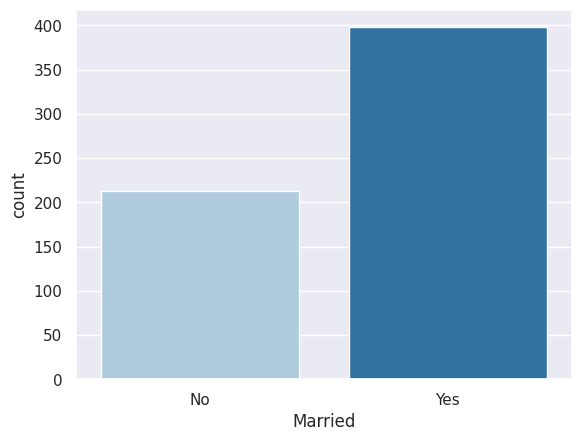

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [37]:
# Uylangan yoki uylanmaganlik bo'yicha taqsimot
print(df.Married.value_counts(dropna=False))

# Uylangan yoki uylanmaganlik bo'yicha grafika
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

# Uylangan yoki uylanmaganlik bo'yicha foizlarni hisoblash
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / len(df.Married)) * 100))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / len(df.Married)) * 100))
print("Missing values percentage: {:.2f}%".format((countNull / len(df.Married)) * 100))


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


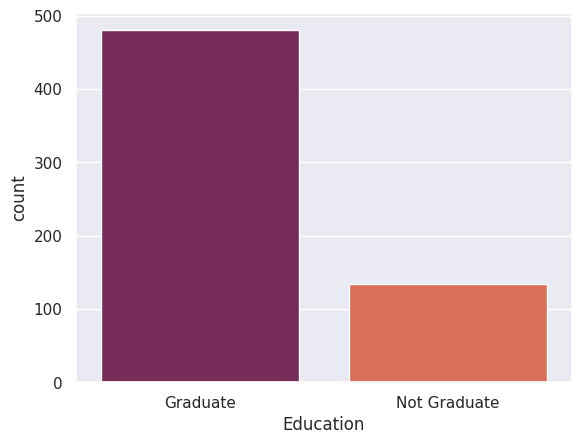

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


In [38]:
# Ta'lim darajasi bo'yicha taqsimot
print(df.Education.value_counts(dropna=False))

# Ta'lim darajasi bo'yicha grafika
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

# Ta'lim darajasi bo'yicha foizlarni hisoblash
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / len(df.Education)) * 100))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / len(df.Education)) * 100))
print("Missing values percentage: {:.2f}%".format((countNull / len(df.Education)) * 100))


In [39]:
df.isnull().sum()

# Null qiymatlarni to'ldirish
df = df.drop(['Loan_ID'], axis=1)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Faqat sonli ustunlar uchun IQR filtratsiyasi
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

filtered_df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(filtered_df.shape)
print(filtered_df.head())

(396, 5)
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  


In [40]:

df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N'], axis=1)
df.rename(columns={'Gender_Male': 'Gender', 'Married_Yes': 'Married', 'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed', 'Loan_Status_Y': 'Loan_Status'}, inplace=True)


df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])


In [41]:
# Ma'lumotlarni ajratish va SMOTE
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
X, y = SMOTE().fit_resample(X, y)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)
y_pred = LRclassifier.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_pred, y_test) * 100))




# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
LRAcc = accuracy_score(y_test, lr.predict(X_test))

# K Neighbors
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
KNAcc = accuracy_score(y_test, kn.predict(X_test))

# SVM
svc = SVC()
svc.fit(X_train, y_train)
SVCAcc = accuracy_score(y_test, svc.predict(X_test))

# Categorical Naive Bayes
nb1 = CategoricalNB()
nb1.fit(X_train, y_train)
NBAcc1 = accuracy_score(y_test, nb1.predict(X_test))

# Gaussian Naive Bayes
nb2 = GaussianNB()
nb2.fit(X_train, y_train)
NBAcc2 = accuracy_score(y_test, nb2.predict(X_test))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
DTAcc = accuracy_score(y_test, dt.predict(X_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RFAcc = accuracy_score(y_test, rf.predict(X_test))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
GBAcc = accuracy_score(y_test, gb.predict(X_test))

# Model natijalarini taqqoslash
models = ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Random Forest', 'Gradient Boost']
accuracies = [LRAcc * 100, KNAcc * 100, SVCAcc * 100, NBAcc1 * 100, NBAcc2 * 100, DTAcc * 100, RFAcc * 100, GBAcc * 100]

compare = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(compare)

Logistic Regression
              precision    recall  f1-score   support

       False       0.96      0.62      0.75        86
        True       0.71      0.98      0.82        83

    accuracy                           0.79       169
   macro avg       0.84      0.80      0.79       169
weighted avg       0.84      0.79      0.79       169

[[53 33]
 [ 2 81]]
Accuracy: 79.29%
                 Model   Accuracy
0  Logistic Regression  79.289941
1          K Neighbors  72.189349
2                  SVM  79.881657
3       Categorical NB  78.698225
4          Gaussian NB  70.414201
5        Decision Tree  78.698225
6        Random Forest  81.065089
7       Gradient Boost  81.065089


* 👉 In general, it can be seen that all models can achieve up to 70% accuracy.
* 👉 The highest accuracy is 93%.

 :).

* 👉 Умумий ҳолда, барча моделлар 70% гача табриклаш имкониятига эга.
* 👉 Энг ёқуний натижа 93%га етади.

 :).


* 👉 В целом можно сказать, что все модели достигают точности до 70%.
* 👉 Самая высокая точность - 93%.

 w:).